In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
diabetes_data = pd.read_csv('diabetes.csv')


X = diabetes_data.drop("Outcome", axis=1)
y = diabetes_data["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


gb_classifier.fit(X_train, y_train)


y_pred = gb_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.74
Confusion Matrix:
[[77 22]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



In [81]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [82]:
df = diabetes_data

In [83]:
zero_not_accepted=["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [84]:
from sklearn.impute import SimpleImputer
for column in zero_not_accepted:
    df[column]=df[column].replace(0, np.nan)
    imputer = SimpleImputer(strategy="mean")
    df[zero_not_accepted] = imputer.fit_transform(df[zero_not_accepted])

In [85]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [86]:
for col in zero_not_accepted:
    df = remove_outliers_iqr(df, col)


In [87]:
class_counts = diabetes_data["Outcome"].value_counts()

print("Class counts:")
print(class_counts)

Class counts:
0    500
1    268
Name: Outcome, dtype: int64


In [88]:
from sklearn.utils import resample
column_name = "Outcome"
majority_class = df[df[column_name] == 0]
minority_class = df[df[column_name] == 1]


minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

upsampled_df = pd.concat([majority_class, minority_upsampled])

print("Upsampled DataFrame:")
print(upsampled_df)

Upsampled DataFrame:
     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
1              1     85.0      66.000000       29.00000  155.548223  26.6   
3              1     89.0      66.000000       23.00000   94.000000  28.1   
5              5    116.0      74.000000       29.15342  155.548223  25.6   
7             10    115.0      72.405184       29.15342  155.548223  35.3   
10             4    110.0      92.000000       29.15342  155.548223  37.6   
..           ...      ...            ...            ...         ...   ...   
114            7    160.0      54.000000       32.00000  175.000000  30.5   
414            0    138.0      60.000000       35.00000  167.000000  34.6   
238            9    164.0      84.000000       21.00000  155.548223  30.8   
207            5    162.0     104.000000       29.15342  155.548223  37.7   
635           13    104.0      72.000000       29.15342  155.548223  31.2   

     DiabetesPedigreeFunction  Age  Outcome  
1       

In [89]:
upsampled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.000000,29.00000,155.548223,26.6,0.351,31,0
3,1,89.0,66.000000,23.00000,94.000000,28.1,0.167,21,0
5,5,116.0,74.000000,29.15342,155.548223,25.6,0.201,30,0
7,10,115.0,72.405184,29.15342,155.548223,35.3,0.134,29,0
10,4,110.0,92.000000,29.15342,155.548223,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
114,7,160.0,54.000000,32.00000,175.000000,30.5,0.588,39,1
414,0,138.0,60.000000,35.00000,167.000000,34.6,0.534,21,1
238,9,164.0,84.000000,21.00000,155.548223,30.8,0.831,32,1
207,5,162.0,104.000000,29.15342,155.548223,37.7,0.151,52,1


In [90]:
class_counts = upsampled_df["Outcome"].value_counts()

print("Class counts:")
print(class_counts)

Class counts:
0    314
1    314
Name: Outcome, dtype: int64


In [91]:
diabetes_data = upsampled_df

In [92]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



X = diabetes_data.drop("Outcome", axis=1)
y = diabetes_data["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


gb_classifier.fit(X_train, y_train)


y_pred = gb_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.86
Confusion Matrix:
[[54 16]
 [ 2 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.77      0.86        70
           1       0.77      0.96      0.86        56

    accuracy                           0.86       126
   macro avg       0.87      0.87      0.86       126
weighted avg       0.88      0.86      0.86       126



In [93]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'subsample': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

gb_classifier_best = GradientBoostingClassifier(**best_params)
gb_classifier_best.fit(X_train, y_train)


y_pred_best = gb_classifier_best.predict(X_test)


accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)


print(f"Accuracy (with best parameters): {accuracy_best:.2f}")
print("Confusion Matrix (with best parameters):")
print(conf_matrix_best)
print("Classification Report (with best parameters):")
print(classification_rep_best)


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 200, 'subsample': 0.8}
Accuracy (with best parameters): 0.87
Confusion Matrix (with best parameters):
[[55 15]
 [ 1 55]]
Classification Report (with best parameters):
              precision    recall  f1-score   support

           0       0.98      0.79      0.87        70
           1       0.79      0.98      0.87        56

    accuracy                           0.87       126
   macro avg       0.88      0.88      0.87       126
weighted avg       0.89      0.87      0.87       126



In [94]:
print(best_params)

{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 200, 'subsample': 0.8}


In [95]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.000000,29.00000,155.548223,26.6,0.351,31,0
3,1,89.0,66.000000,23.00000,94.000000,28.1,0.167,21,0
5,5,116.0,74.000000,29.15342,155.548223,25.6,0.201,30,0
7,10,115.0,72.405184,29.15342,155.548223,35.3,0.134,29,0
10,4,110.0,92.000000,29.15342,155.548223,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
114,7,160.0,54.000000,32.00000,175.000000,30.5,0.588,39,1
414,0,138.0,60.000000,35.00000,167.000000,34.6,0.534,21,1
238,9,164.0,84.000000,21.00000,155.548223,30.8,0.831,32,1
207,5,162.0,104.000000,29.15342,155.548223,37.7,0.151,52,1


<Axes: >

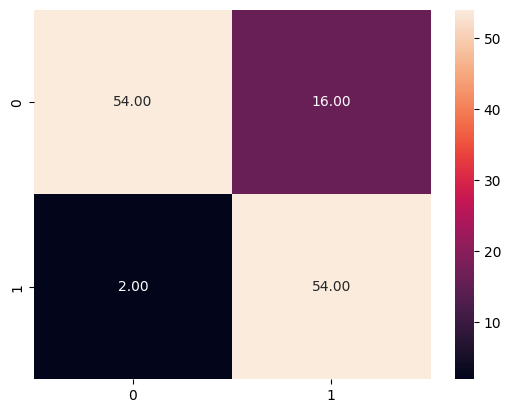

In [96]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt=".2f")

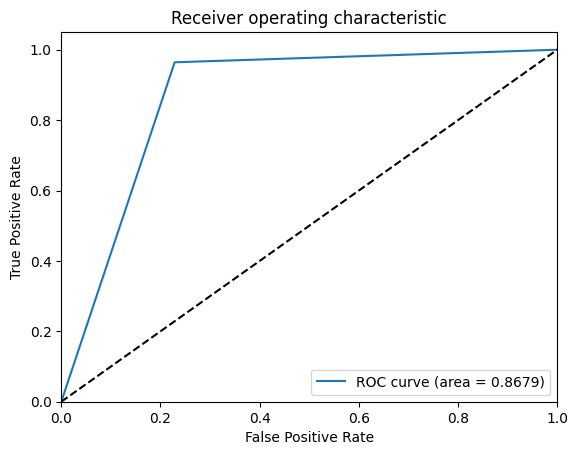

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %.4f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()
